### Data Source
https://www.kaggle.com/datasets/abcsds/pokemon

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Distribution of Pokemon Types:

<Axes: ylabel='count'>

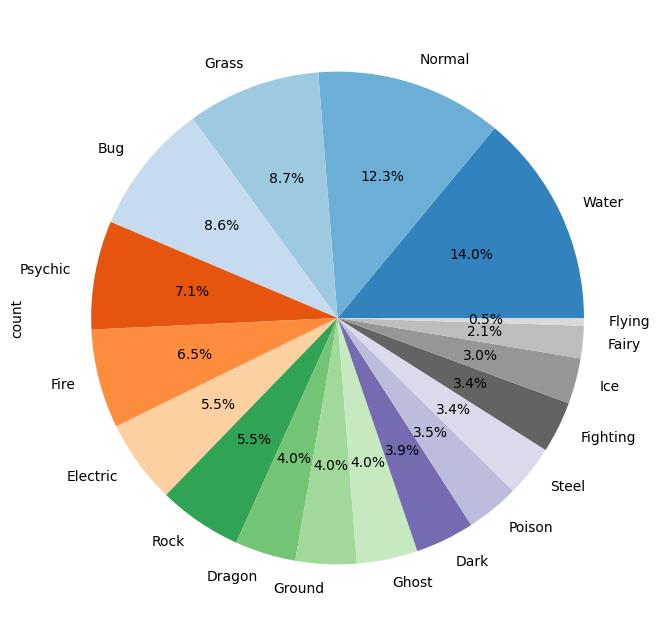

In [9]:
df['Type 1'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='tab20c', figsize=(10, 8))

#### Distribution of Pokemon Totals:

<Axes: ylabel='Frequency'>

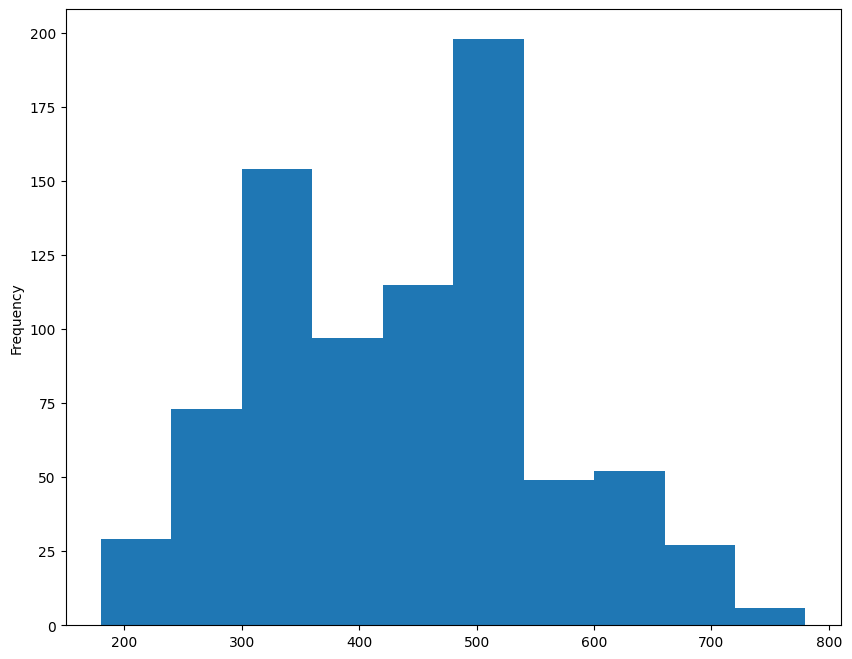

In [10]:
df['Total'].plot(kind='hist', figsize=(10, 8))

<Axes: >

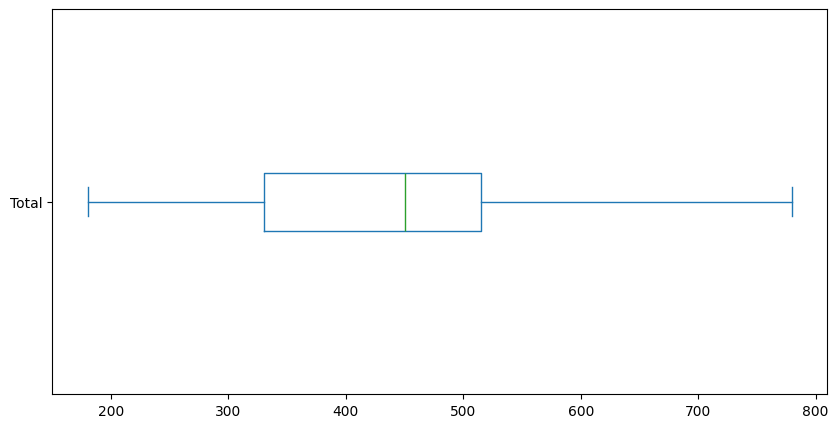

In [11]:
df['Total'].plot(kind='box', vert=False, figsize=(10, 5))

#### Distribution of Legendary Pokemons:

<Axes: ylabel='count'>

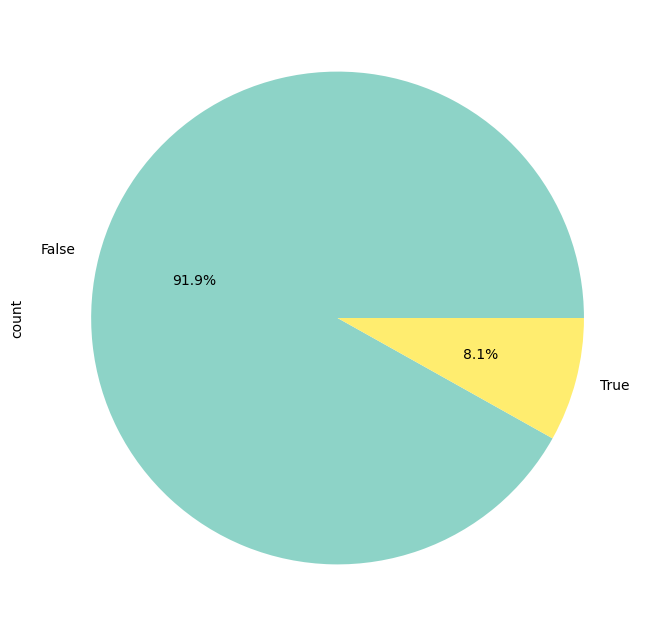

In [12]:
df['Legendary'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

### Basic filtering

Let's start with a few simple activities regarding filtering.



##### 1. How many Pokemons exist with an `Attack` value greater than 150?
Doing a little bit of visual exploration, we can have a sense of the most "powerful" pokemons (defined by their "Attack" feature). A boxplot is a great way to visualize this:

<Axes: xlabel='Attack'>

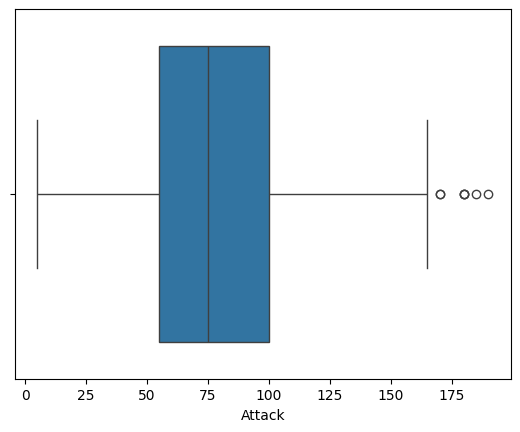

In [15]:
sns.boxplot(data=df, x='Attack')

In [21]:
df[df['Attack'] > 150].shape[0]

18

In [22]:
df.query('Attack > 150').shape[0]

18

##### 2. Select all pokemons with a Speed of `10` or less

<Axes: xlabel='Speed'>

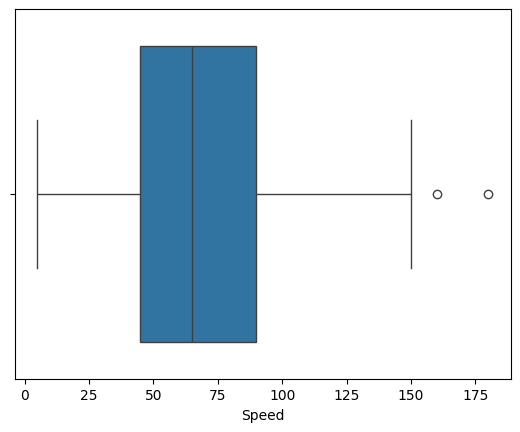

In [23]:
sns.boxplot(data=df, x='Speed')

In [27]:
(df['Speed'] <= 10).sum()

5

In [26]:
slow_pokemons_df = df[df['Speed'] <= 10].shape[0]
slow_pokemons_df

5

##### 3. How many Pokemons have a `Sp. Def` value of 25 or less?

In [28]:
(df['Sp. Def'] == 25).sum()

11

##### 4. Select all the Legendary pokemons

In [29]:
legendary_df = df[df['Legendary'] == True]
legendary_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


##### 5. Find the outlier
Find the pokemon that is clearly an outlier in terms of Attack / Defense:

Text(150, 10, "Who's this guy?")

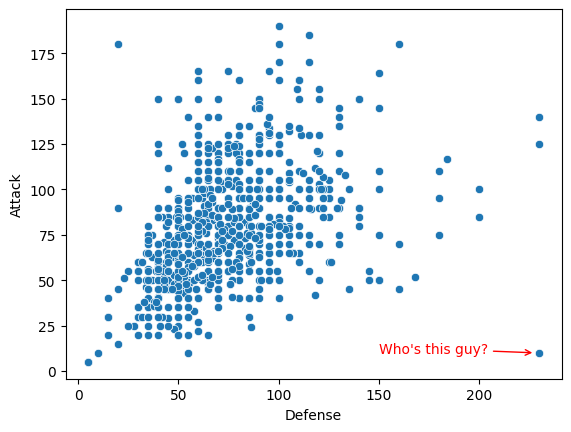

In [30]:
ax = sns.scatterplot(data=df, x="Defense", y="Attack")
ax.annotate(
    "Who's this guy?", xy=(228, 10), xytext=(150, 10), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [41]:
df.sort_values(by=['Defense', 'Attack'], ascending=[False, True]).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


### Advanced selection

Now let's use boolean operators to create more advanced expressions



##### 6. How many Fire-Flying Pokemons are there?

In [43]:
((df['Type 1'] == 'Fire') & (df['Type 2'] == 'Flying')).sum()

6

##### 7. How many 'Poison' pokemons are across both types?


In [46]:
((df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')).sum()

62

##### 8. Name the pokemon of `Type 1` *Ice* which has the strongest defense?

In [48]:
df[df['Type 1'] == 'Ice'].sort_values(by='Defense', ascending=False).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


##### 9. What's the most common type of Legendary Pokemons?

In [54]:
df[df['Legendary']].value_counts('Type 1').head(1)

Type 1
Psychic    14
Name: count, dtype: int64

<Axes: xlabel='Type 1'>

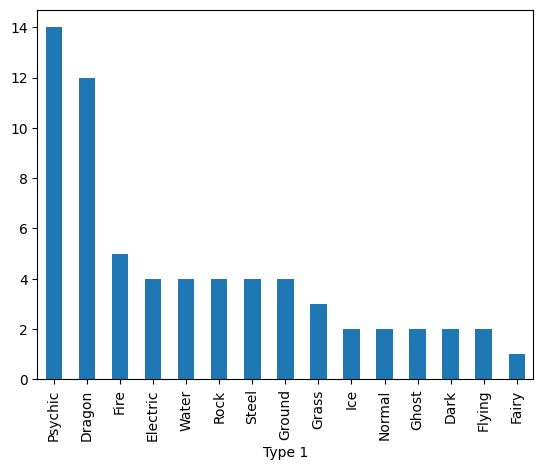

In [56]:
df.loc[df['Legendary'], 'Type 1'].value_counts().plot(kind = 'bar')

##### 10. What's the most powerful pokemon from the first 3 generations, of type water?

In [64]:
df[(df['Type 1'] == 'Water') & (df['Generation'] <= 3)].sort_values(by='Total', ascending=False).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True


##### 11. What's the most powerful Dragon from the last two generations?

In [70]:
df[
    ((df['Type 1'] == 'Dragon') | (df['Type 2'] == 'Dragon')) 
    & 
    (df['Generation'] >= (df['Generation'].max() - 1))
].sort_values(by='Total', ascending=False).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True


##### 12. Select most powerful Fire-type pokemons

In [80]:
powerful_fire_df = df.query('`Type 1` == "Fire" and `Attack` > 100')
powerful_fire_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
354,323,CameruptMega Camerupt,Fire,Ground,560,70,120,100,145,105,20,3,False
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False


##### 13. Select all Water-type, Flying-type pokemons

In [81]:
water_flying_df = df.query('`Type 1` == "Water" and `Type 2` == "Flying"')
water_flying_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
301,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
302,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
641,580,Ducklett,Water,Flying,305,62,44,50,44,50,55,5,False
642,581,Swanna,Water,Flying,473,75,87,63,87,63,98,5,False


##### 14. Select specific columns of Legendary pokemons of type Fire

In [86]:
legendary_fire_df = df.query('`Type 1` == "Fire" and `Legendary` == True')[['Name', 'Attack', 'Generation']]
legendary_fire_df

,Name,Attack,Generation
158,Moltres,100,1
263,Entei,115,2
270,Ho-oh,130,2
542,Heatran,90,4
799,Volcanion,110,6


##### 15. Select Slow and Fast pokemons

This is the distribution of speed of the pokemons. The red lines indicate those bottom 5% and top 5% pokemons by speed:

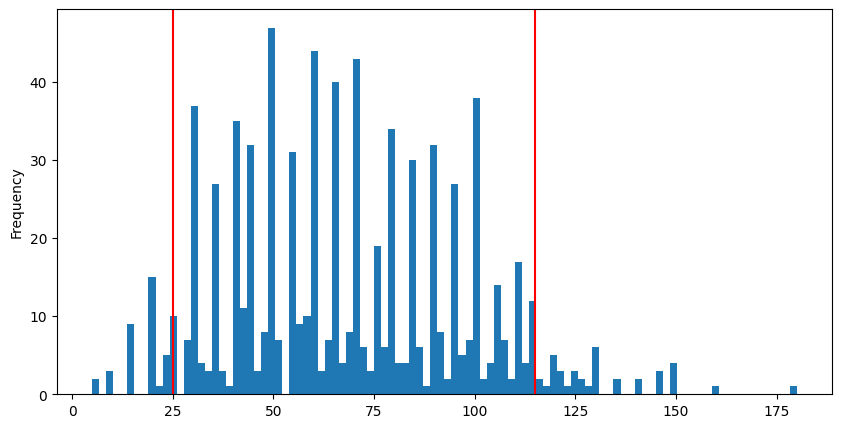

In [82]:
ax = df['Speed'].plot(kind='hist', figsize=(10, 5), bins=100)
ax.axvline(df['Speed'].quantile(.05), color='red')
ax.axvline(df['Speed'].quantile(.95), color='red')

In [93]:
less_than_5, greater_than_95 = np.percentile(df['Speed'], [5,95])
slow_fast_df = df[(less_than_5 > df['Speed']) | (df['Speed'] > greater_than_95)]
slow_fast_df


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
70,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
752,682,Spritzee,Fairy,NaN,341,78,52,60,63,65,23,6,False
771,701,Hawlucha,Fighting,Flying,500,78,92,75,74,63,118,6,False


##### 16. Find the Ultra Powerful Legendary Pokemon

Text(160, 150, "Who's this guy?")

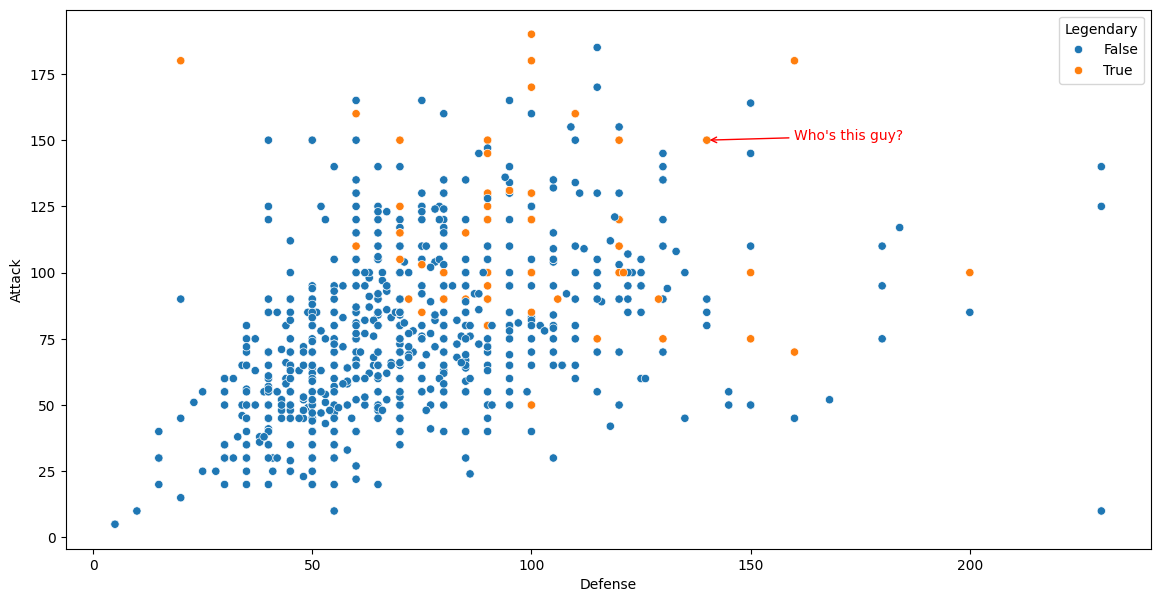

In [100]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(data=df, x="Defense", y="Attack", hue='Legendary', ax=ax)
ax.annotate(
    "Who's this guy?", xy=(140, 150), xytext=(160, 150), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [102]:
df.query('`Legendary` == True and `Attack` > 150 and `Defense` > 150')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


### The End!